#### Projenin Amaçları

    -Enflasyonun tanımını yapmak,
    -Enflasyonun artışına etki eden faktörleri belirtmek,
    -Belirlenen öz niteliklerle bir lineer regresyon modeli eğitmek,
    -Eğitilen bu modelle tahminler yapmak,
    -Bu modelin doğruluk score'unu belirlemek,
    -Elimizde olan verileri kullanarak, enflasyonun geleceğini tahmin etmek
    -Gelecekte enflasyonun hayatımıza etkisini somut örneklerle anlatmak

#### Verilerin alındığı kaynak
    
    Projede kullanılan veriler Türkiye Cumhuriyeti Merkez Bankası , Elektronik Veri Dağıtım Sistemi'nden alınmıştır
    Link -> https://evds2.tcmb.gov.tr/index.php?
    
    

#### Motivasyon

    Son zamanlarda aşırı hayat pahalılığının sebebi olan enflasyonun nedenlerini anlamak buna etki eden unsurları öğrenmek ve   devam edegelen süreçte enflasyonun hayat pahalılığına olan etkisini öngörmek. 
        

#### Enflasyon Nedir?
    
    Enflasyon, mal ve hizmetlerin fiyatlarının artmasıdır. 
    Ancak mal ve hizmetlerin fiyatları zaman içinde artabilir veya azalabilir. 
    Enflasyon sadece belli bir malın veya hizmetin fiyatının tek başına artması değil, fiyatların genel düzeyinin sürekli bir artış göstermesidir.
    Diğer bir deyişle, sadece bazı malların fiyatlarının sürekli artması ya da tüm malların fiyatlarının bir sefer artması enflasyon değildir. 
    Örneğin aylık enflasyon oranının yüzde 1 olması, o ay içinde fiyatlar genel seviyesinin bir önceki aya göre yüzde 1 oranında arttığını gösterir. 
    Yıllık enflasyonun yüzde 30 olması da, fiyatların bir önceki yıla göre ortalama yüzde 30 oranında arttığını, örneğin geçen yıl 200 TL’ye alınan bir mal sepetinin bu yıl ancak 260 TL’ye alınabileceğini ifade eder.


    Enflasyon oranları, merkez bankalarının para politikalarında atacağı adımları doğrudan etkileyebileceğinden, kurlar üzerinde de oldukça etkilidir. 
    Çünkü enflasyon oranı, merkez bankalarının faiz oranları üzerinde yapacağı değişiklikler için öncü göstergelerdir. 

#### Enflasyonun Artışına Etki Eden Faktörler
   
    
    -Talebin yüksek olması
    -Üretilen mal ve hizmetlerin talebi karşılayamaması
    -Üretimin azalması 
    -Tüketimdeki artış
    -Girdi maliyetlerinin artması
    -Para arzının azalması
    -Döviz kurlarındaki artış
    -Dış ticaret açığının büyümesi
    
    
    Talebi azaltıcı (faiz artırımı vb…) ya da üretimi arttırıcı önlemler alınarak çözülebilir.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
dolar = pd.read_excel('Döviz kuru.xlsx',skip_footer=8)
dolar.head()

/home/behlul/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:178: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


,Tarih,TP DK USD A,Unnamed: 2
0,2005-01,1.350042,NaN
1,2005-02,1.310155,NaN
2,2005-03,1.304957,NaN
3,2005-04,1.353514,NaN
4,2005-05,1.365048,NaN


In [3]:
dolar.rename(columns={'TP DK USD A': 'Dolar Kuru'}, inplace=True)
dolar.dropna(1,inplace=True)

In [4]:
dolar.head()

,Tarih,Dolar Kuru
0,2005-01,1.350042
1,2005-02,1.310155
2,2005-03,1.304957
3,2005-04,1.353514
4,2005-05,1.365048


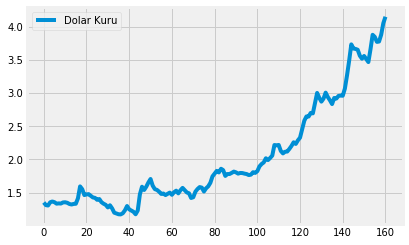

In [5]:
dolar.plot()

In [6]:
euro = pd.read_excel("euro kuru.xlsx",skip_footer=8)
euro.head()

,Tarih,Euro Kuru,Unnamed: 2
0,2005-01,1.787316,NaN
1,2005-02,1.712190,NaN
2,2005-03,1.730204,NaN
3,2005-04,1.760467,NaN
4,2005-05,1.745952,NaN


In [7]:
euro.dropna(1,inplace=True)
euro.head()

,Tarih,Euro Kuru
0,2005-01,1.787316
1,2005-02,1.712190
2,2005-03,1.730204
3,2005-04,1.760467
4,2005-05,1.745952


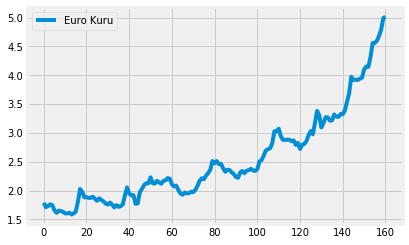

In [8]:
euro.plot()

In [9]:
altın = pd.read_excel("gr altın fiyatı.xlsx",skip_footer=8)

In [10]:
altın.head()

,Tarih,TP MK KUL YTL,Unnamed: 2
0,2005-01,18.62,NaN
1,2005-02,18.00,NaN
2,2005-03,18.28,NaN
3,2005-04,19.06,NaN
4,2005-05,18.73,NaN


In [11]:
altın.rename(columns={'TP MK KUL YTL': 'Gram Altın Fiyatı'}, inplace=True)
altın.dropna(1,inplace=True)

In [12]:
altın.head()

,Tarih,Gram Altın Fiyatı
0,2005-01,18.62
1,2005-02,18.00
2,2005-03,18.28
3,2005-04,19.06
4,2005-05,18.73


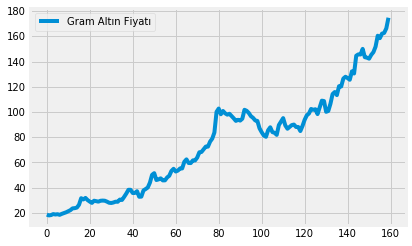

In [13]:
altın.plot()

In [14]:
ticaret = pd.read_excel("dış ticaret.xls",skiprows=7,skip_footer=2)

In [15]:
ticaret.head()

,Years,Months,Value,(%),Unnamed: 4,Value.1,(%).1,Unnamed: 7,Value.2,(%).2,Unnamed: 10,Value.3,(%).3,Unnamed: 13,by exports (%)
0,2005-01,1,4997279.724,8.174169,NaN,7.219680e+06,14.055750,NaN,-2222400.138,29.942418,NaN,1.221696e+07,11.574302,NaN,69.217470
1,2005-02,2,5651741.252,54.229405,NaN,8.323737e+06,35.578071,NaN,-2671995.545,7.962086,NaN,1.397548e+07,42.549537,NaN,67.899087
2,2005-03,3,6591859.218,26.328209,NaN,1.019635e+07,20.639948,NaN,-3604493.714,11.461530,NaN,1.678821e+07,22.811253,NaN,64.649186
3,2005-04,4,6128131.878,20.811761,NaN,9.595500e+06,20.971493,NaN,-3467368.425,21.254834,NaN,1.572363e+07,20.909189,NaN,63.864642
4,2005-05,5,5977226.217,15.612282,NaN,9.811620e+06,22.790250,NaN,-3834394.239,35.947721,NaN,1.578885e+07,19.970432,NaN,60.919868


In [16]:
ticaret.dropna(axis=1,how="all",inplace=True)
ticaret.dropna(axis=0,how="all",inplace=True)
ticaret.head()

,Years,Months,Value,(%),Value.1,(%).1,Value.2,(%).2,Value.3,(%).3,by exports (%)
0,2005-01,1,4997279.724,8.174169,7.219680e+06,14.055750,-2222400.138,29.942418,1.221696e+07,11.574302,69.217470
1,2005-02,2,5651741.252,54.229405,8.323737e+06,35.578071,-2671995.545,7.962086,1.397548e+07,42.549537,67.899087
2,2005-03,3,6591859.218,26.328209,1.019635e+07,20.639948,-3604493.714,11.461530,1.678821e+07,22.811253,64.649186
3,2005-04,4,6128131.878,20.811761,9.595500e+06,20.971493,-3467368.425,21.254834,1.572363e+07,20.909189,63.864642
4,2005-05,5,5977226.217,15.612282,9.811620e+06,22.790250,-3834394.239,35.947721,1.578885e+07,19.970432,60.919868


In [17]:
selected = ["Years","Value","Value.1"]
ticaret = ticaret[selected]

In [18]:
ticaret.rename(columns={"Years":"Tarih","Value":"İhracat","Value.1":"İthalat"},inplace=True)

In [19]:
ticaret.head()

,Tarih,İhracat,İthalat
0,2005-01,4997279.724,7.219680e+06
1,2005-02,5651741.252,8.323737e+06
2,2005-03,6591859.218,1.019635e+07
3,2005-04,6128131.878,9.595500e+06
4,2005-05,5977226.217,9.811620e+06


In [20]:
ticaret["dış ticaret açığı"] = ticaret["İthalat"]-ticaret["İhracat"]

In [21]:
ticaret.head()

,Tarih,İhracat,İthalat,dış ticaret açığı
0,2005-01,4997279.724,7.219680e+06,2222400.138
1,2005-02,5651741.252,8.323737e+06,2671995.545
2,2005-03,6591859.218,1.019635e+07,3604493.714
3,2005-04,6128131.878,9.595500e+06,3467368.425
4,2005-05,5977226.217,9.811620e+06,3834394.239


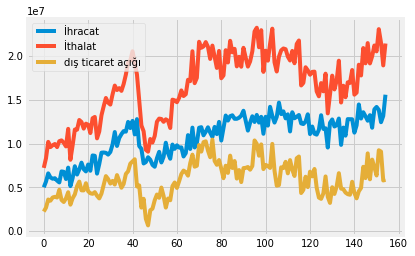

In [22]:
ticaret.plot()

In [23]:
sanayi_uretim_endeksi = pd.read_excel("sanayi üretim endeksi.xlsx",skip_footer=12)

In [24]:
sanayi_uretim_endeksi.head()

,Tarih,TP SANAYREV4 Y1,Unnamed: 2
0,2005-01,49.92,NaN
1,2005-02,51.26,NaN
2,2005-03,58.72,NaN
3,2005-04,56.63,NaN
4,2005-05,59.08,NaN


In [25]:
sanayi_uretim_endeksi.rename(columns={"TP SANAYREV4 Y1":"Sanayi Üretim Endeksi"},inplace=True)
sanayi_uretim_endeksi.dropna(1,inplace=True)
sanayi_uretim_endeksi.head()

,Tarih,Sanayi Üretim Endeksi
0,2005-01,49.92
1,2005-02,51.26
2,2005-03,58.72
3,2005-04,56.63
4,2005-05,59.08


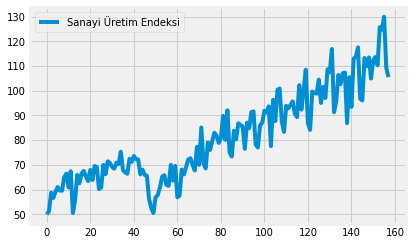

In [26]:
sanayi_uretim_endeksi.plot()

In [27]:
faiz = pd.read_excel("Tüketici Kredisine Uygulanan Ortalama Faiz Oranları.xlsx",skip_footer=11)
faiz.head()

,Tarih,TP KTFTUK,Unnamed: 2
0,2005-10,18.9150,NaN
1,2005-11,18.3525,NaN
2,2005-12,17.8780,NaN
3,2006-01,17.6100,NaN
4,2006-02,17.2975,NaN


In [28]:
faiz.dropna(1,inplace=True)
faiz.rename(columns={"TP KTFTUK":"Tüketici Faiz Oranı"},inplace=True)
faiz.tail()

,Tarih,Tüketici Faiz Oranı
144,2017-10,17.0225
145,2017-11,17.1550
146,2017-12,17.7180
147,2018-01,18.6050
148,2018-02,18.9150


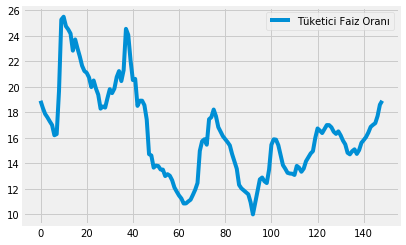

In [29]:
faiz.plot()

In [30]:
tüfe = pd.read_excel("tüfe.xlsx",skip_footer=12)
tüfe.head()

,Tarih,TP FG J0,Unnamed: 2
0,2005-01,114.49,NaN
1,2005-02,114.51,NaN
2,2005-03,114.81,NaN
3,2005-04,115.63,NaN
4,2005-05,116.69,NaN


In [31]:
tüfe.rename(columns={"TP FG J0":"Tüfe"},inplace=True)
tüfe.dropna(1,inplace=True)
tüfe.head()

,Tarih,Tüfe
0,2005-01,114.49
1,2005-02,114.51
2,2005-03,114.81
3,2005-04,115.63
4,2005-05,116.69


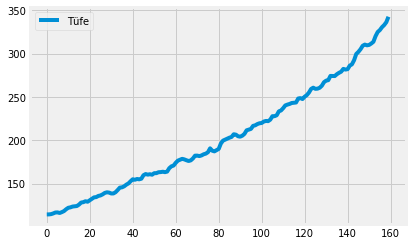

In [32]:
tüfe.plot()

In [33]:
dataset = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    pd.merge(dolar,euro,on="Tarih"),altın,on="Tarih"),
                ticaret,on="Tarih"),
            sanayi_uretim_endeksi,on="Tarih"),
        faiz,on="Tarih"),
    tüfe,on="Tarih")


In [34]:
dataset.tail(10)

,Tarih,Dolar Kuru,Euro Kuru,Gram Altın Fiyatı,İhracat,İthalat,dış ticaret açığı,Sanayi Üretim Endeksi,Tüketici Faiz Oranı,Tüfe
135,2017-05,3.563862,3.939467,143.42,1.358248e+07,2.092337e+07,7340892.683,113.51,15.6125,310.61
136,2017-06,3.518990,3.955775,143.01,1.312557e+07,1.917699e+07,6051415.572,104.94,15.8320,309.78
137,2017-07,3.559867,4.098805,142.27,1.261248e+07,2.149087e+07,8878392.845,112.38,16.0700,310.24
138,2017-08,3.512477,4.151086,145.30,1.324870e+07,1.916208e+07,5913380.154,113.67,16.4200,311.85
139,2017-09,3.468047,4.145147,147.42,1.181051e+07,1.997868e+07,8168166.322,110.33,16.8620,313.88
140,2017-10,3.662259,4.316055,151.76,1.391350e+07,2.121729e+07,7303785.994,125.75,17.0225,320.40
141,2017-11,3.879050,4.557818,160.43,1.418951e+07,2.054068e+07,6351171.741,124.79,17.1550,325.18
142,2017-12,3.847705,4.560729,158.48,1.384806e+07,2.308530e+07,9237245.740,129.99,17.7180,327.41
143,2018-01,3.772327,4.599559,162.09,1.244050e+07,2.152274e+07,9082247.274,109.31,18.6050,330.75
144,2018-02,3.778020,4.681585,162.66,1.315787e+07,1.893716e+07,5779294.806,105.54,18.9150,333.17


In [35]:
dataset.set_index("Tarih",inplace=True)

In [36]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [37]:
X.shape

(145, 8)

In [38]:
y.shape

(145,)

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 40)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [40]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
from sklearn import linear_model
regressor = linear_model.Lasso(alpha=0.1)

In [41]:
regressor.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [42]:
y_pred = regressor.predict(X_test)

NameError: name 'X_test' is not defined

In [43]:
y_pred

array([316.4891567 , 214.62540733, 184.68644695, 261.72282487,
       238.34536432, 254.48272129, 195.59288348, 176.81008092,
       262.58349327, 134.40656528, 229.57883186, 171.60181654,
       202.29507803, 210.95002164, 237.84337541, 139.12536081,
       142.19991124, 204.30027155, 271.26176993, 258.74618095,
       256.82427776, 150.92808606, 196.80429317, 147.89064669,
       327.35996297, 166.03712316, 135.05073882, 135.66441368,
       136.25320307])

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

In [45]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [ 3.90437320e+01  1.41825460e+01  2.66136877e-01  4.66493897e-06
 -1.24621382e-07 -2.33336473e-07 -5.79546647e-02 -1.87897557e+00]


In [46]:
# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

Mean absolute error: 7.82


In [47]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.97


In [48]:
regressor.predict([[1.330920,1.636725,26.45,6456090.261,1.158710e+07,-5131011.733,62.50,16.2075]])

array([138.05891829])

In [49]:
regressor.predict([[3.559867,4.098805,142.27,1.261248e+07,2.149087e+07,-4131011.733,112.38,16.0700]])

array([315.4470684])

In [50]:
def enflasyonHesapla(tarih1,tarih2,tl):
    yeniTl = tl*(dataset.loc[tarih2].Tüfe/dataset.loc[tarih1].Tüfe)
    print("",tarih1,"tarihindeki",tl,"Lira\n",tarih2,"tarihindeki",yeniTl,"Lira'ya denktir")

In [51]:
enflasyonHesapla("2005-10","2018-02",100)

 2005-10 tarihindeki 100 Lira
 2018-02 tarihindeki 276.604400166044 Lira'ya denktir


In [52]:
from fbprophet import Prophet

In [53]:
tüfe.dtypes

Tarih     object
Tüfe     float64
dtype: object

In [54]:
tüfe["Tarih"] = pd.DatetimeIndex(tüfe["Tarih"])

In [55]:
tüfe.dtypes

Tarih    datetime64[ns]
Tüfe            float64
dtype: object

In [56]:
tüfe = tüfe.rename(columns={'Tarih': 'ds',
                        'Tüfe': 'y'})

In [57]:
tüfe.head()

,ds,y
0,2005-01-01,114.49
1,2005-02-01,114.51
2,2005-03-01,114.81
3,2005-04-01,115.63
4,2005-05-01,116.69


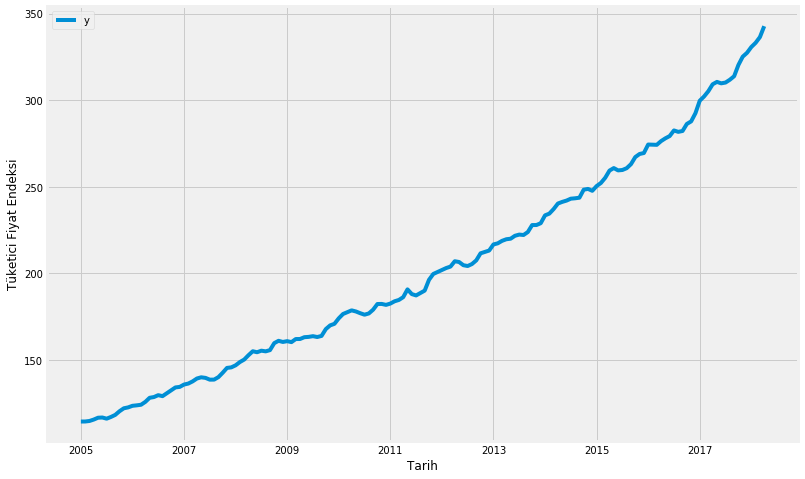

In [58]:
ax = tüfe.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Tüketici Fiyat Endeksi')
ax.set_xlabel('Tarih')

plt.show()

In [59]:
my_model = Prophet(interval_width=0.95)

In [60]:
my_model.fit(tüfe)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\BEHLUL KOKSOYA\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [61]:
future_dates = my_model.make_future_dataframe(periods=48, freq='MS')
future_dates.tail()

,ds
203,2021-12-01
204,2022-01-01
205,2022-02-01
206,2022-03-01
207,2022-04-01


In [62]:
forecast = my_model.predict(future_dates)
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
0,2005-01-01,111.655549,111.655549,111.655549,109.832657,117.361969,1.770068,1.770068,1.770068,1.770068,1.770068,1.770068,1.770068,1.770068,1.770068,113.425618
1,2005-02-01,112.646792,112.646792,112.646792,110.299230,117.477372,1.260868,1.260868,1.260868,1.260868,1.260868,1.260868,1.260868,1.260868,1.260868,113.907660
2,2005-03-01,113.542108,113.542108,113.542108,110.827608,118.552055,1.127347,1.127347,1.127347,1.127347,1.127347,1.127347,1.127347,1.127347,1.127347,114.669455
3,2005-04-01,114.533350,114.533350,114.533350,112.720332,120.197969,1.919078,1.919078,1.919078,1.919078,1.919078,1.919078,1.919078,1.919078,1.919078,116.452428
4,2005-05-01,115.492617,115.492617,115.492617,112.929625,120.504584,1.287107,1.287107,1.287107,1.287107,1.287107,1.287107,1.287107,1.287107,1.287107,116.779724
5,2005-06-01,116.483860,116.483860,116.483860,112.320684,119.862612,-0.248468,-0.248468,-0.248468,-0.248468,-0.248468,-0.248468,-0.248468,-0.248468,-0.248468,116.235392
6,2005-07-01,117.443127,117.443127,117.443127,112.447244,120.119524,-1.039686,-1.039686,-1.039686,-1.039686,-1.039686,-1.039686,-1.039686,-1.039686,-1.039686,116.403440
7,2005-08-01,118.434369,118.434369,118.434369,112.336373,120.334364,-2.202084,-2.202084,-2.202084,-2.202084,-2.202084,-2.202084,-2.202084,-2.202084,-2.202084,116.232286
8,2005-09-01,119.425612,119.425612,119.425612,113.325592,120.877152,-2.298564,-2.298564,-2.298564,-2.298564,-2.298564,-2.298564,-2.298564,-2.298564,-2.298564,117.127048
9,2005-10-01,120.384879,120.384879,120.384879,116.919487,124.564377,0.226829,0.226829,0.226829,0.226829,0.226829,0.226829,0.226829,0.226829,0.226829,120.611708


In [63]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
203,2021-12-01,435.981527,424.090699,448.352469
204,2022-01-01,439.895541,426.732601,452.283928
205,2022-02-01,441.872951,429.737246,454.407685
206,2022-03-01,444.094036,430.810175,456.615175
207,2022-04-01,447.514706,434.168056,461.439665


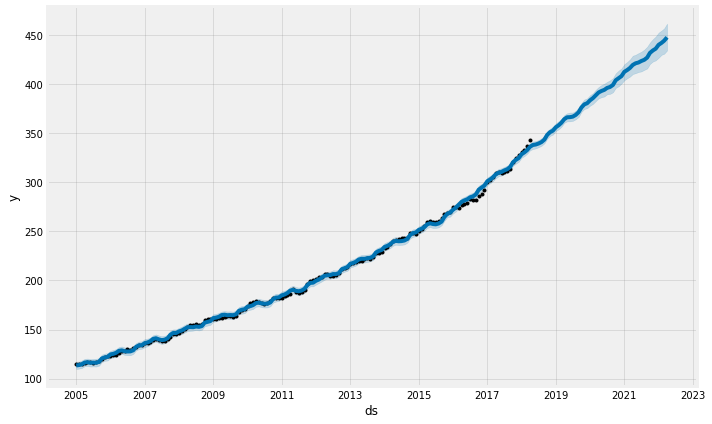

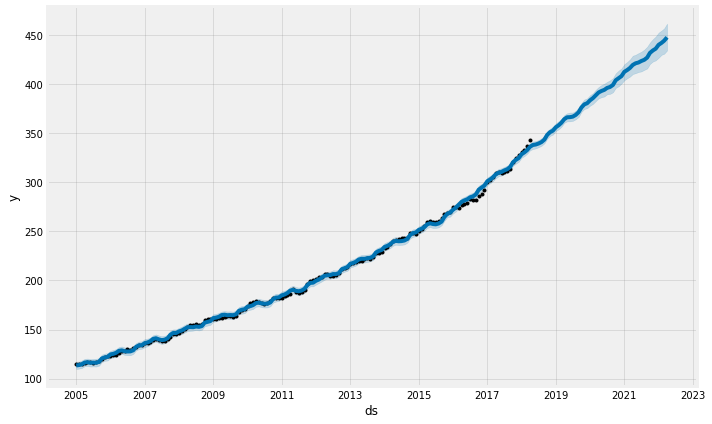

In [64]:
my_model.plot(forecast)

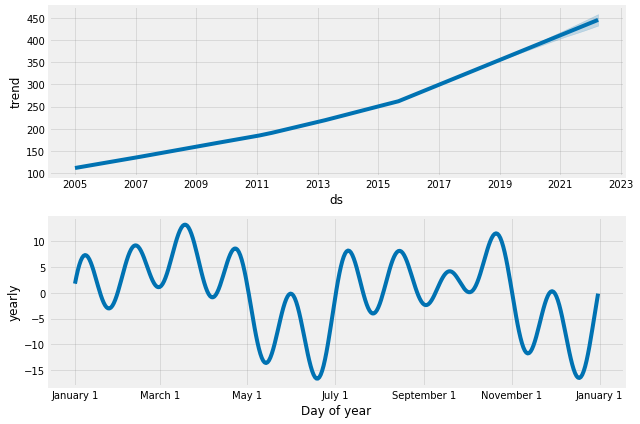

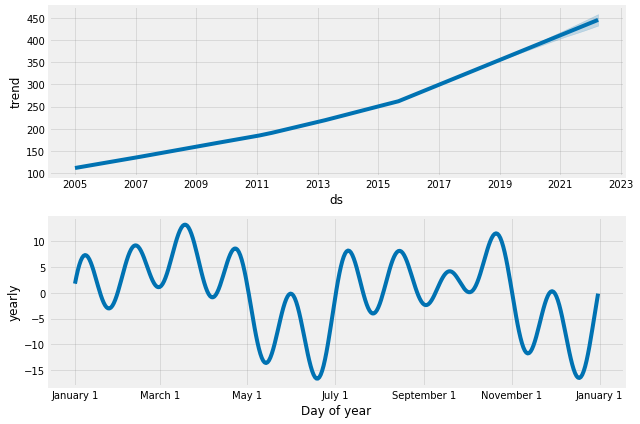

In [65]:
my_model.plot_components(forecast)

In [66]:
forecast.set_index(forecast["ds"],inplace=True)

In [67]:
def yeniEnflasyonHesapla(dataset,tarih1,tarih2,tl):
    yeniTl = tl*(dataset.loc[tarih2].yhat/dataset.loc[tarih1].yhat)
    print("",tarih1,"tarihindeki",tl,"Lira\n",tarih2,"tarihindeki",yeniTl,"Lira'ya denktir")

In [68]:
yeniEnflasyonHesapla(forecast,"2018-01-01","2022-01-01",1603)

 2018-01-01 tarihindeki 1603 Lira
 2022-01-01 tarihindeki 2146.606726975398 Lira'ya denktir


In [69]:
yeniEnflasyonHesapla(forecast,"2018-01-01","2022-01-01",250000)

 2018-01-01 tarihindeki 250000 Lira
 2022-01-01 tarihindeki 334779.5893598562 Lira'ya denktir


In [70]:
yeniEnflasyonHesapla(forecast,"2018-01-01","2022-01-01",200)

 2018-01-01 tarihindeki 200 Lira
 2022-01-01 tarihindeki 267.82367148788495 Lira'ya denktir
